## 단변량분석_숫자형변수

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 1) titanic

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


#### 2) New York Air Quality

In [3]:
air = pd.read_csv('https://bit.ly/3qmthqZ')
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


## 1. 수치화

### (1) 대푯값

#### 1) 평균

In [4]:
# 산술평균
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.mean(a))

10.476190476190476


In [5]:
titanic['Fare'].mean()

32.2042079685746

In [6]:
# 조화평균
# 거리 20km. 갈때 속력 60km. 올때 속력 80km --> 평균 속력은?

a1, a2 = 60, 80
hm = 2*a1*a2 / (a1 + a2)
print(hm)

68.57142857142857


#### 2) 중앙값 (중위수, median)

In [7]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.median(a))

8.0


In [8]:
titanic['Fare'].median()

14.4542

#### 3) 최빈값

In [9]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
a = pd.Series(a)
a.mode()

0    4
dtype: int64

#### 4) 4분위수

In [10]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.percentile(a, [0, 25, 50, 75, 100]))

[ 1.  4.  8. 17. 30.]


In [11]:
# nan을 제외하고 나머지 데이터 가져오기
temp = titanic.loc[titanic['Age'].notnull(), 'Age']
print(np.percentile(temp, [0, 25, 50, 75, 100]))

[ 0.42  20.125 28.    38.    80.   ]


### (2) 기초통계량 

#### 1) Series.describe()

In [12]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### 2) DataFrame.describe()

In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [14]:
# 문자형 데이터까지 count
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,3
top,NaN,NaN,NaN,"Johanson, Mr. Jakob Alfred",male,NaN,NaN,Southhampton
freq,NaN,NaN,NaN,1,577,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,31.000000,NaN


## 2. 시각화

### (1) 히스토그램

#### 1) 히스토그램 기본

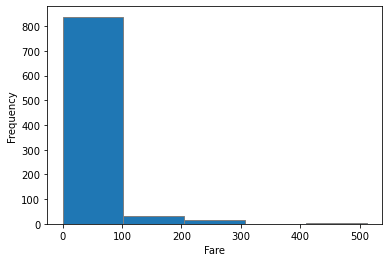

In [15]:
plt.hist(titanic['Fare'], bins = 5, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

#### 2) 구간의 개수 조정

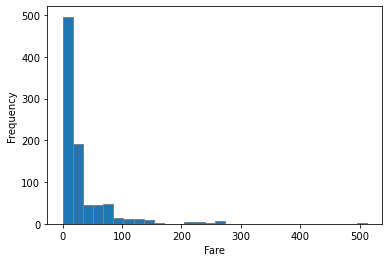

In [16]:
plt.hist(titanic['Fare'], bins = 30, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

#### 3) 구간 값과 개수를 확인

- 결과를 저장하면, 구간과 빈도수를 확인.
    - 히스토그램을 저장하면 튜플.
    - 튜플 안에는 numpy array가 2개로 구성.
        - 첫번째 numpy array는 빈도수.
        - 두번째 numpy array는 구간 값.

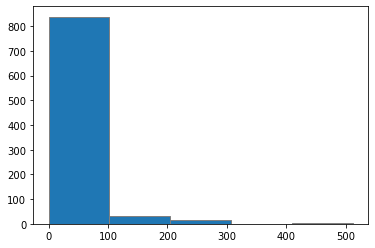

(array([838.,  33.,  17.,   0.,   3.]), array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336, 512.3292 ]), <BarContainer object of 5 artists>)
<class 'tuple'>
--------------------------------------------------
빈도수 :  [838.  33.  17.   0.   3.]
구간값 :  [  0.      102.46584 204.93168 307.39752 409.86336 512.3292 ]


In [17]:
hist1 = plt.hist(titanic['Fare'], bins = 5, edgecolor = 'gray')
plt.show()

print(hist1)
print(type(hist1))
print('-' * 50)
print('빈도수 : ', hist1[0])
print('구간값 : ', hist1[1])

### (2) 밀도함수 그래프

- 히스토그램의 단점
    - 구간 bin에 따라 전혀 다른 모양이 될 수 있음.
    
- 밀도함수 그래프
    - 막대의 너비를 가정하지 않고 모든 점에서 데이터의 밀도를 추정하는 커널 밀도 추정 (Kernel Density Estimation) 방식을 사용하여 단점 해결.
    - 밀도함수 그래프 아래 면적은 1

#### 1) 밀도함수 그래프 그리기

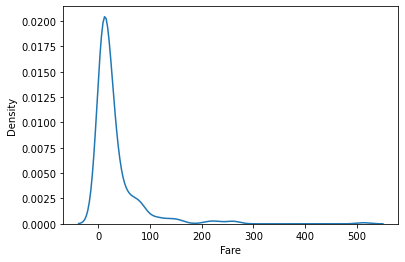

In [18]:
sns.kdeplot(titanic['Fare'])
plt.show()

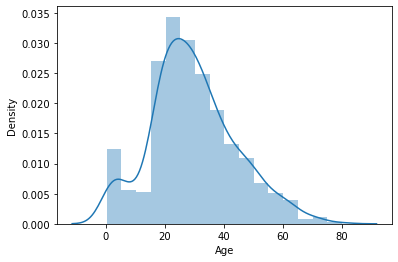

In [19]:
sns.distplot(titanic['Age'], hist = True, bins = 16)
plt.show()

### (3) boxplot

#### 주의사항 : 값에 nan이 있으면 그래프가 그려지지 않습니다.
    - notnull로 먼저 작업

#### 1) boxplot 기본

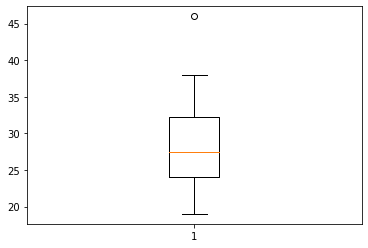

In [20]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
plt.boxplot(age)
plt.show()

#### 2) 옆으로 그리기

- 사분위수 += 1.5 * IQR의 가장 근접한 실제 값을 Fence로 표기.

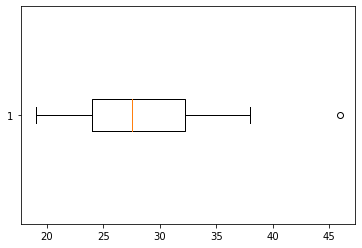

In [21]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
plt.boxplot(age, vert = False)
plt.show()

#### 3) 박스플롯의 값들 가져오기

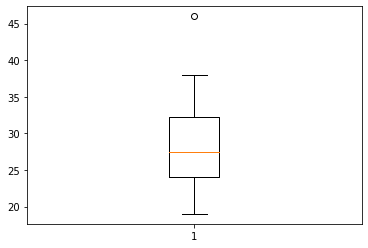

<class 'dict'>
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
--------------------------------------------------
[<matplotlib.lines.Line2D object at 0x0000016994D8BE50>, <matplotlib.lines.Line2D object at 0x0000016994D981F0>]
[24. 19.]
[32.25 38.  ]


In [22]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
box1 = plt.boxplot(age)
plt.show()

print(type(box1))
print(box1.keys())
print('-' * 50)
print(box1['whiskers'])
print(box1['whiskers'][0].get_ydata()) # 아래쪽 수염의 max, min
print(box1['whiskers'][1].get_ydata()) # 위쪽 수염의 min, max

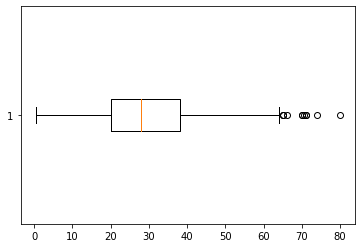

In [23]:
# notnull 이후 boxplot 그리기
temp = titanic.loc[titanic['Age'].notnull(), 'Age']
plt.boxplot(temp, vert = False)
plt.show()

### (4) 시계열 데이터 시각화

- 보통 시간축 (x축) 에 맞게 값들을 라인차트로 표현.

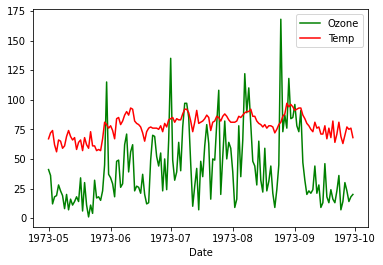

In [24]:
air['Date'] = pd.to_datetime(air['Date']) # 날짜 형식으로 변환

plt.plot('Date', 'Ozone', 'g-', data = air, label = 'Ozone')
plt.plot('Date', 'Temp', 'r-', data = air, label = 'Temp')

plt.xlabel('Date')
plt.legend()
plt.show()